# Day 15

## part 1

- if the robot moves into a box it will push it unless that means a box would hit a wall.
- GPS coordinate = $100l + c$ where $l$ is the line number and $c$ is the char number
- Find the sum of all the GPS coordinates of all boxes

In [1]:
from dataclasses import dataclass
import logging

from matplotlib import pyplot as plt
from tqdm import tqdm

from advent_of_code_utils.advent_of_code_utils import (
    parse_from_file, ParseConfig as PC, markdown, plot_grid, create_gif,
    embed_image, Point2 as P
)

log = logging.getLogger('day 15')
logging.basicConfig(level=logging.INFO)

In [2]:
directions = {
    '^': P(-1, 0),
    '>': P(0, 1),
    'v': P(1, 0),
    '<': P(0, -1),
    '\n': None
}

def parse_move(move: str) -> P:
    """convers puzzle input moves into vectors"""
    return directions[move]

parser = PC('\n\n', [
    PC('\n', PC('', str)),  # grid
    PC('', parse_move)  # moves
])

grid, moves = parse_from_file('day_15_example.txt', parser)
moves = [m for m in moves if m is not None]
log.info(f'loaded {len(moves)} moves')

INFO:advent_of_code_utils.py:2 items loaded from "day_15_example.txt"
INFO:day 15:loaded 15 moves


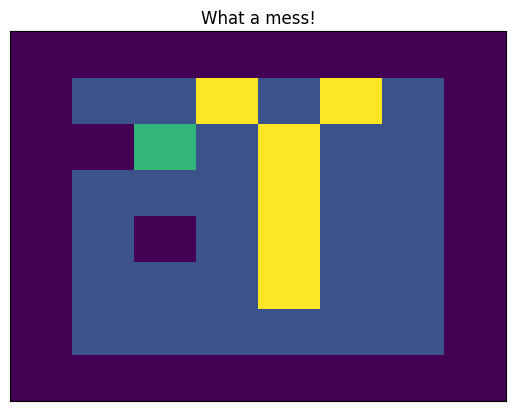

In [3]:
def plot_storage(grid: list[list[str]], ax: plt.Axes) -> None:
    """renders the grid state of the storage"""
    temp = [[ord(char) for char in line] for line in grid]
    plot_grid(temp, ax)

fig, ax = plt.subplots()
ax.set_title('What a mess!')
plot_storage(grid, ax)

I really want to make a gif out of this but there are 20k moves and the previous one was unhappy with 10k. Not to mention just caching all those states is going to be fairly hefty for solving the puzzle. So I think I'm going to have to compress what happens frame-frame to help with that.

100%|██████████| 15/15 [00:00<00:00, 59.90it/s]


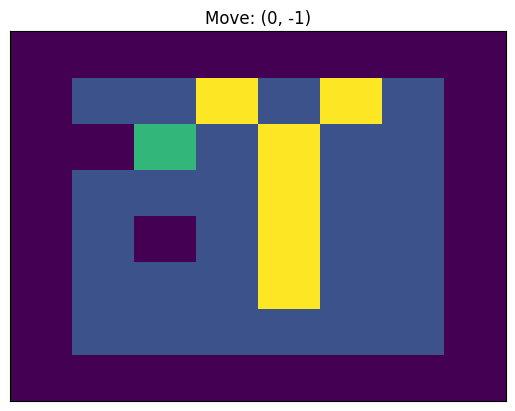

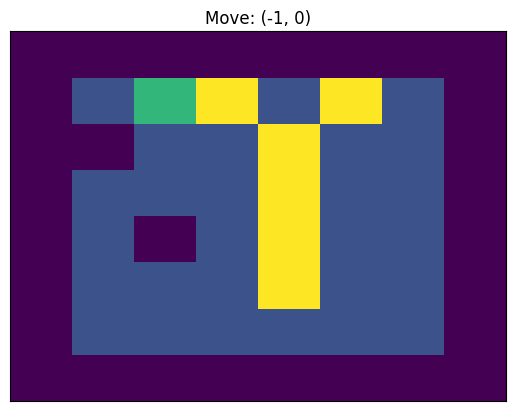

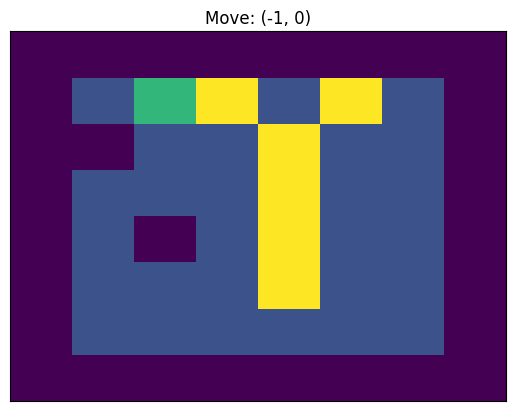

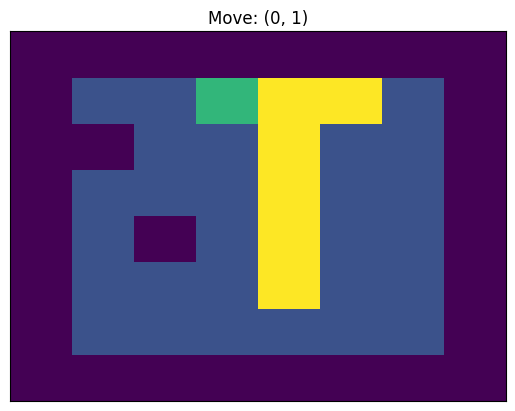

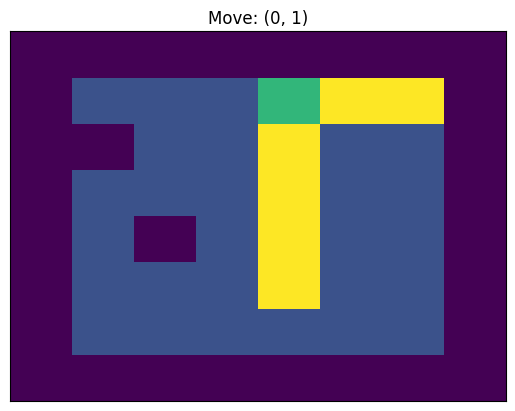

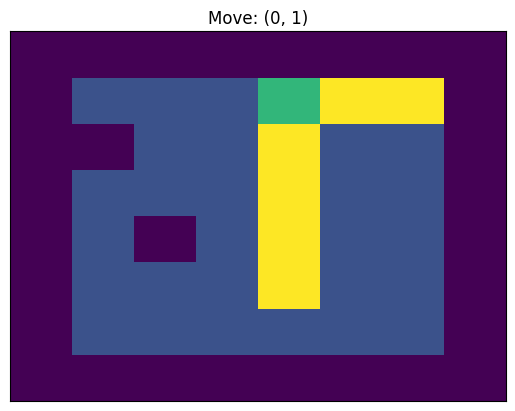

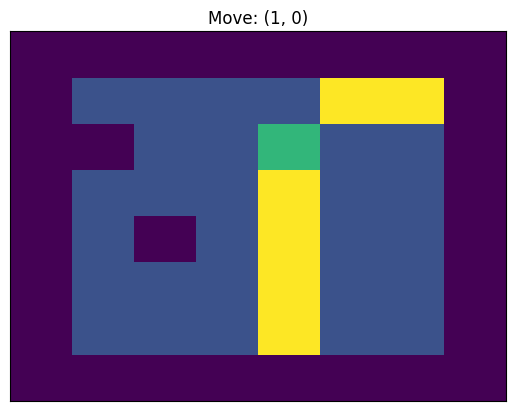

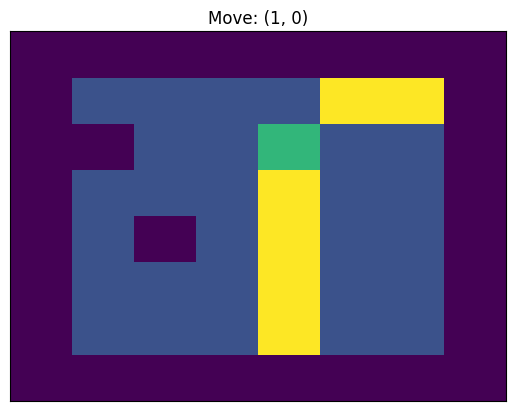

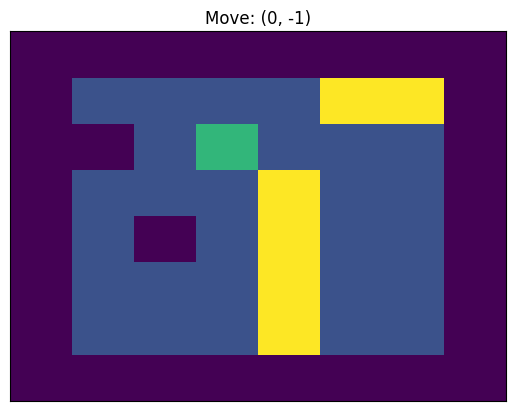

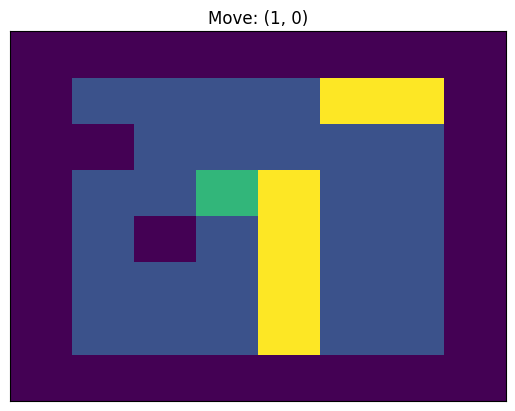

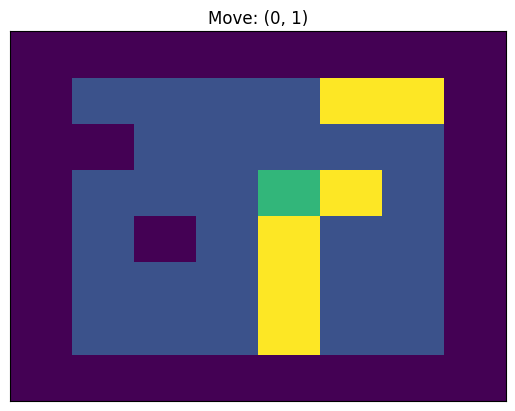

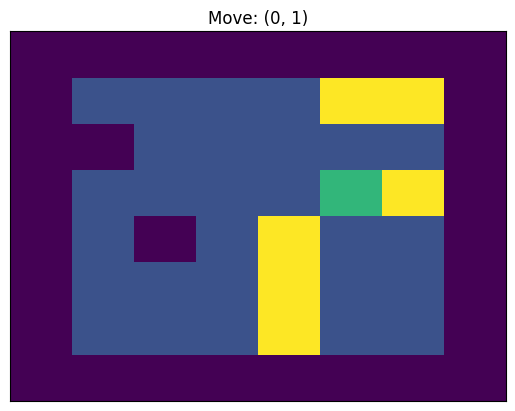

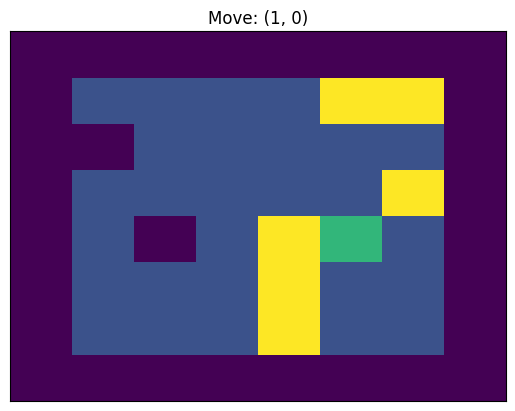

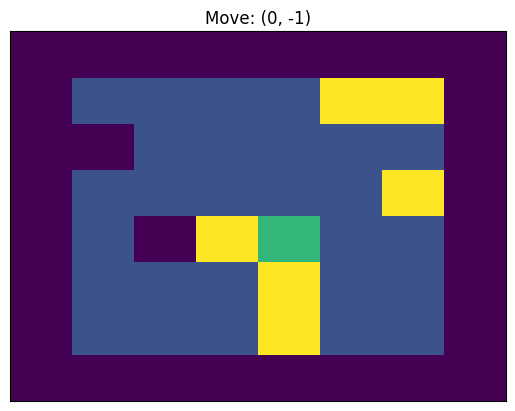

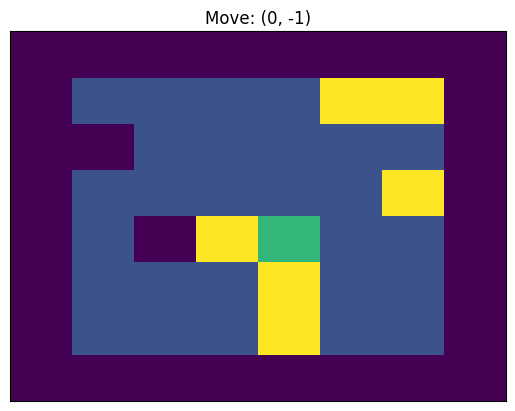

In [4]:
@dataclass
class Diff:
    """this will help store the difference at each step"""
    c: str
    f: P
    t: P

def move_robot(
    move: P, grid: list[list[str]], robot: P, create_plots: bool = False
) -> tuple[list[Diff], P]:
    """updates the grid with the new robot position"""  
    # try moving the robot
    current = P(robot.l, robot.c)
    next_tile = current + move
    updates = []
    # while in bounds, check going in that direction what lies in front
    while 0 <= next_tile.l < len(grid) and 0 <= next_tile.c < len(grid[0]):
        # if the next thing is a wall we can't move anymore
        if grid[next_tile.l][next_tile.c] in '#':
            updates = []  # clear updates so nothing gets updated
            break
        # otherwise add the update and increment the tile
        updates.append(Diff(grid[current.l][current.c], current, next_tile))
        # if the next tile is a space, break now that the update is appended
        if grid[next_tile.l][next_tile.c] in '.':
            break
        current = next_tile
        next_tile = current + move
    
    # then enact the updates in reverse

    for update in reversed(updates):
        grid[update.t.l][update.t.c] = update.c
        grid[update.f.l][update.f.c] = '.'
        if update.c == '@':
            robot += move

    log.debug(f'{updates=}')

    if create_plots:
        fig, ax = plt.subplots()
        ax.set_title(f'Move: {move}')
        plot_storage(grid, ax)

    return updates, robot

def find_robot(grid: list[list[str]]) -> P:
    """returns the coordinate of the robot"""
    for l, line in enumerate(grid):
        for c, char in enumerate(line):
            if char == '@':
                return P(l, c)
    else:
        raise ValueError(f'Can\'t find robot!')

updates = []
robot = find_robot(grid)
for move in tqdm(moves):
    temp, robot = move_robot(move, grid, robot, create_plots=True)
    updates.append(temp)

In [5]:
# ok that looks good let's run for real
grid, moves = parse_from_file('day_15.txt', parser)
moves = [m for m in moves if m is not None]
log.info(f'loaded {len(moves)} moves')
updates = []
robot = find_robot(grid)
for move in tqdm(moves):
    temp, robot = move_robot(move, grid, robot)
    updates.append(temp)

INFO:advent_of_code_utils.py:2 items loaded from "day_15.txt"
INFO:day 15:loaded 20000 moves
100%|██████████| 20000/20000 [00:00<00:00, 52905.61it/s]


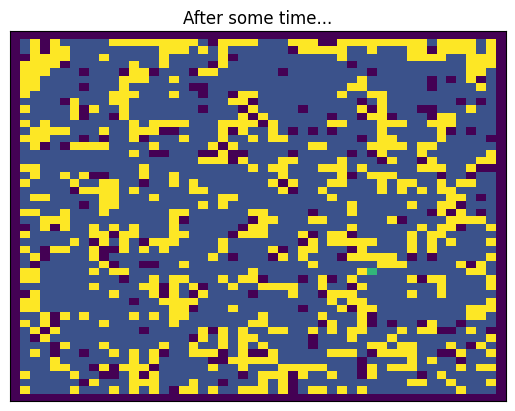

In [6]:
fig, ax = plt.subplots()
ax.set_title('After some time...')
plot_storage(grid, ax)

In [7]:
def get_total_gps(grid: list[list[str]]) -> int:
    """returns the total gps score for the store room"""
    total = 0
    for l, line in enumerate(grid):
        for c, char in enumerate(line):
            if char == 'O':
                total += (100 * l) + c
    return total

markdown(f'the total GPS after the moves is: {get_total_gps(grid)}')

the total GPS after the moves is: 1471826